**Create and visualize tokens**

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# list of sentences
text = [ 'All that we are is the result of what we have thought',
         'To be or not to be that is the question',
         'Be yourself everyone else is already taken' ]

In [ ]:
# create a vocab of unique words
allwords = []
for phrase in text:
  words = re.split(r'\s', phrase.lower())
  allwords.extend(words)
vocab = sorted(set(allwords))
vocab

In [ ]:
# create an enconder and decoder disctionaries
word2idx = {}
for i, word in enumerate(vocab):
  word2idx[word] = i
idx2word = {}
for i, word in enumerate(vocab):
  idx2word[i] = word

word2idx

In [ ]:
# create the encode function that takes text input and gives a list of integers as tokens
def encode(phrase):
  words = re.split(r'\s', phrase.lower())
  return [ word2idx[word] for word in words ]


In [ ]:
tokens = encode('we already are the result of what everyone else already thought')
print(tokens)

In [ ]:
# create the decode function that takes list of tokens as integers and gives the text
def decode(tokens_list):
  return ' '.join(idx2word[i] for i in tokens_list)


In [ ]:
phrase = decode(tokens)
print(phrase)

In [ ]:
print(vocab) # Just a reminder what words in the vocabulary do we have

In [ ]:
# create a phrase, using vocab
another_phrase = 'we have thought what is the question'
# encode text to tokens
tokens = encode(another_phrase)
print(tokens)

# decode tokens to text
phrase_decoded = decode(tokens)
print(phrase_decoded)

***Visualize the tokenized integers***

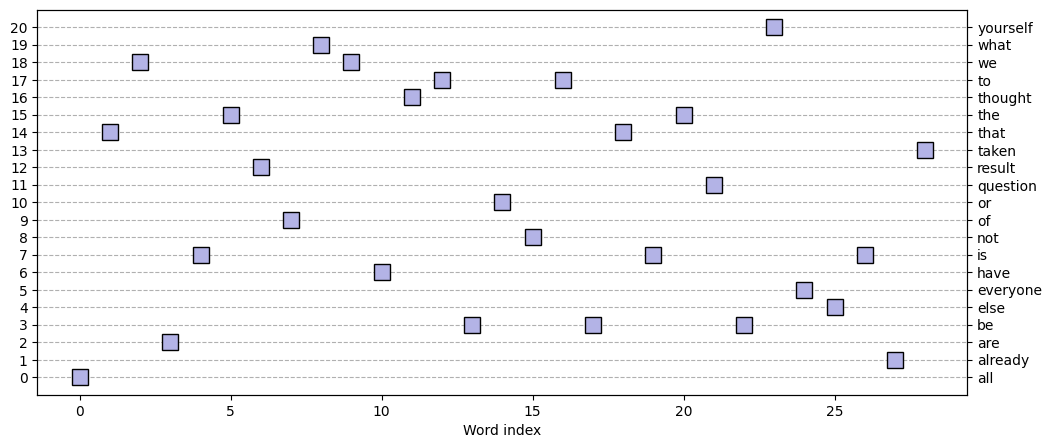

In [27]:
# get all the text and tokens
alltext = ' '.join(text)
tokens = encode(alltext)

# create a figure
_,ax = plt.subplots(1, figsize=(12,5))

# plot the tokens
ax.plot(tokens, 'ks', markersize = 12, markerfacecolor = [.7, .7, .9])
ax.set(xlabel='Word index',yticks=range(len(vocab)))
ax.grid(linestyle='--', axis='y')

# invisible axis for right-hand-side labels
ax2 = ax.twinx()
ax2.plot(tokens, alpha=0)
ax2.set(yticks = range(len(vocab)), yticklabels = vocab)

plt.show()
